In [1]:
import pickle
from PCA import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import sys
import math

In [2]:
ks_to_filepath = {
    1 : "./../data/processed/movements_clr_map_k1.pkl",
    2 : "./../data/processed/movements_clr_map_k2.pkl",
    3 : "./../data/processed/movements_clr_map_k3.pkl",
    4 : "./../data/processed/movements_clr_map_k4.pkl",
    5 : "./../data/processed/movements_clr_map_k5.pkl",
    10 : "./../data/processed/movements_clr_map_k10.pkl"
}

img_colors_map = {}

data_dir = "./../data/resized/movements"

for k in ks_to_filepath:
    with open(ks_to_filepath[k], 'rb') as f:
        img_colors_map[k] = pickle.load(f)


In [4]:
def read_all(img_names, image_folder):
    all_data = {}
    cnt = 0
    for img_name in img_names:
        cnt += 1
        if cnt % 10000 == 0:
            print(f"Reading image {cnt} of {len(img_names)}. Currently it takes up {sys.getsizeof(all_data) / 1024 / 1024} MB")
        img_path = os.path.join(image_folder, img_name)
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            all_data[img_name] = img
        else:
            print(f"Image {img_name} not found")
            
    return all_data

all_images = read_all(img_colors_map[1].keys(), data_dir)
print(f"Number of images: {len(all_images)}")
print(all_images.keys())

Reading image 10000 of 42490. Currently it takes up 0.28133392333984375 MB
Reading image 20000 of 42490. Currently it takes up 0.562591552734375 MB
Reading image 30000 of 42490. Currently it takes up 1.2500839233398438 MB
Reading image 40000 of 42490. Currently it takes up 1.2500839233398438 MB
Number of images: 42490
dict_keys(['Academic_Art/308714.jpg', 'Academic_Art/278410.jpg', 'Academic_Art/9223372032559874241.jpg', 'Academic_Art/9223372032559844046.jpg', 'Academic_Art/9223372032559845581.jpg', 'Academic_Art/9223372032559885438.jpg', 'Academic_Art/9223372032559864599.jpg', 'Academic_Art/9223372032559874339.jpg', 'Academic_Art/232427.jpg', 'Academic_Art/232419.jpg', 'Academic_Art/278515.jpg', 'Academic_Art/9223372032559873475.jpg', 'Academic_Art/9223372032559899811.jpg', 'Academic_Art/232557.jpg', 'Academic_Art/232551.jpg', 'Academic_Art/232343.jpg', 'Academic_Art/9223372032559870602.jpg', 'Academic_Art/295692.jpg', 'Academic_Art/9223372032559844058.jpg', 'Academic_Art/278444.jpg',

In [5]:
def plot_transformed_map(transformed_map, n_show=100):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    for image_name, point in random.sample(list(transformed_map.items()), n_show):
        x, y = point
        ax.scatter(x, y, color='blue', s=0)
        # ax.text(x + 0.02, y + 0.02, image_name, fontsize=9, color='black')
        
        if image_name in all_images:
            img = all_images[image_name]
            imgbox = ax.inset_axes([x, y, 0.1, 0.1], transform=ax.transData)
            imgbox.imshow(img)
            imgbox.axis('off')
        else:
            print(f"Image {image_name} not found")

    plt.axis('off')
    plt.show()

In [9]:
pca = {}
X = {}

for k in img_colors_map:
    X[k] = np.array(list(img_colors_map[k].values())) 
    pca[k] = PCA(n_components=2)
    pca[k].fit(X[k])

transformed_map = {}
for k in img_colors_map:
    transformed_map[k] = {}
    for image_name, color_vec in img_colors_map[k].items():
        transformed_map[k][image_name] = pca[k].transform(color_vec)

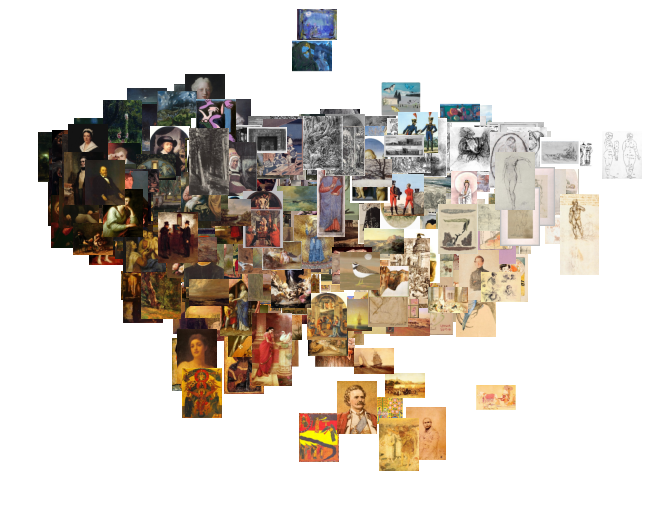

In [14]:
plot_transformed_map(transformed_map[1], 500)

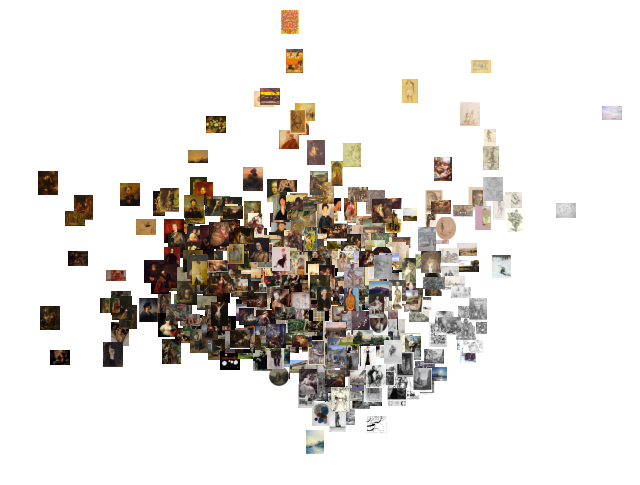

In [15]:
plot_transformed_map(transformed_map[10], 500)

In [25]:
movement_year_map = {
    "Academic_Art" : 1815,
    "Baroque" : 1600,
    "Japanese_Art" : 1800,
    "Primitivism" : 1930,
    "Renaissance" : 1400,
    "Romanticism" : 1818,
    "Western_Medieval" : 1000,
    "Art_Nouveau" : 1890,
    "Expressionism" : 1905,
    "Neoclassicism" : 1785,
    "Realism" : 1850,
    "Rococo" : 1750,
    "Symbolism" : 1880,
}

def year_to_color(year):
    return (year - 1000) / 1000, 0, 0

def img_name_to_year(img_name):
    movement = img_name.split("/")[0]
    return movement_year_map[movement]

sorted_movements = sorted(movement_year_map.items(), key=lambda x: x[1])

num_movements = len(sorted_movements)

def position_to_color(position, num_movements):
    normalized_value = position / (num_movements - 1)
    return (normalized_value, 0, 0)

movement_colors = {
    "Academic_Art" : "black",
    "Baroque" : "red",
    "Japanese_Art" : "blue",
    "Primitivism" : "green",
    "Renaissance" : "yellow",
    "Romanticism" : "purple",
    "Western_Medieval" : "orange",
    "Art_Nouveau" : "pink",
    "Expressionism" : "brown",
    "Neoclassicism" : "lavender",
    "Realism" : "cyan",
    "Rococo" : "magenta",
    "Symbolism" : "lime",
}
    
def img_name_to_clr(img_name):
    movement = img_name.split("/")[0]
    return movement_colors[movement]

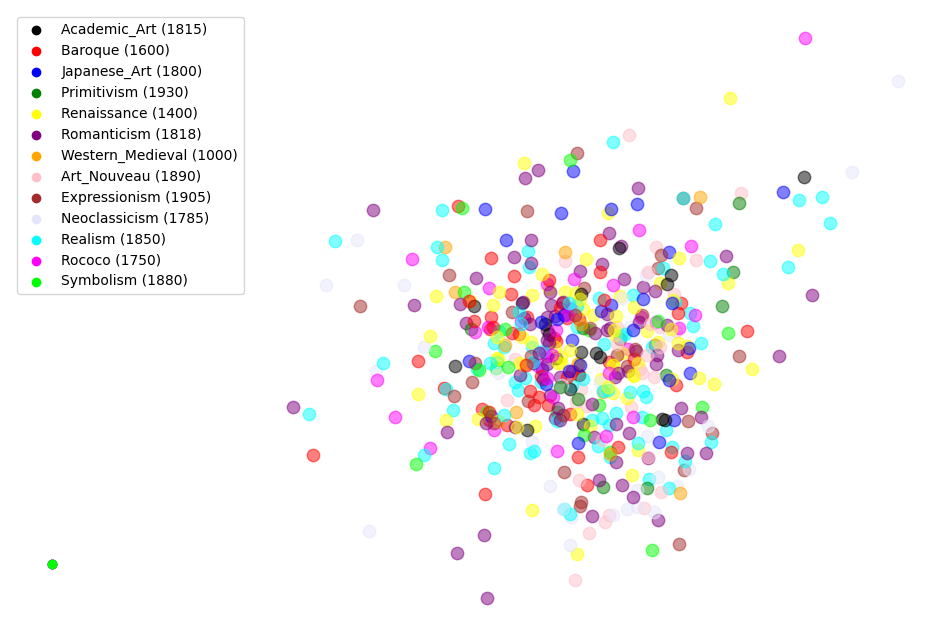

In [24]:
def plot_transformed_map_movements(transformed_map, n_show=100):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for image_name, point in random.sample(list(transformed_map.items()), n_show):
        x, y = point
        img_color = img_name_to_clr(image_name)
        ax.scatter(x, y, color=img_color, s=80, alpha=0.5)
        # ax.text(x + 0.02, y + 0.02, image_name, fontsize=9, color='black')
        
    for movement in movement_year_map.keys():
        year = movement_year_map[movement]
        color = movement_colors[movement]
        ax.scatter(0, 0, color=color, label=f"{movement} ({year})")
    ax.legend()

    plt.axis('off')
    plt.show()
    
plot_transformed_map_movements(transformed_map[10], 500)

In [52]:
def plot_transformed_map_one_movement(transformed_map, n_show=100, movement="Renaissance"):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    for image_name, point in random.sample(list(transformed_map.items()), n_show):
        x, y = point
        img_color = img_name_to_clr(image_name) if image_name.split("/")[0] == movement else "grey"
        alpha = 1 if image_name.split("/")[0] == movement else 0.5
        ax.scatter(x, y, color=img_color, s=80, alpha=alpha)
        # ax.text(x + 0.02, y + 0.02, image_name, fontsize=9, color='black')
        
    # make a legend
    year = movement_year_map[movement]
    ax.scatter(0, 0, color=movement_colors[movement], label=f"{movement} ({year})")
    ax.legend()

    plt.axis('off')
    plt.show()

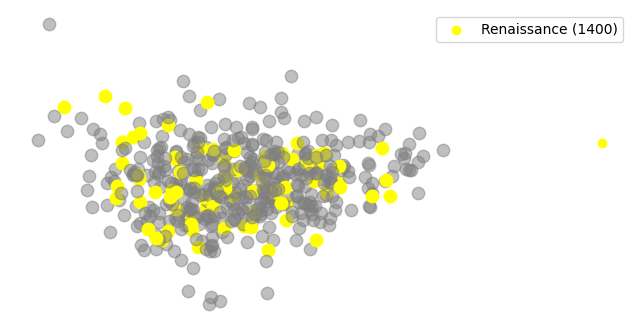

In [53]:
plot_transformed_map_one_movement(transformed_map, 500, "Renaissance")

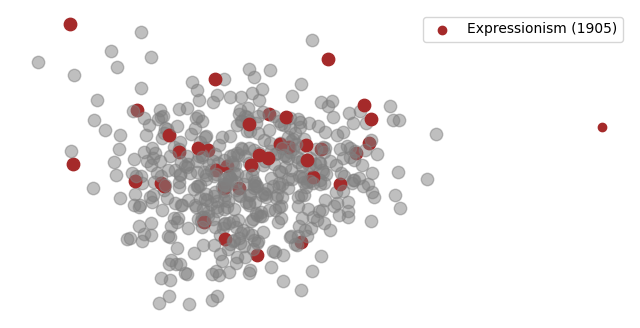

In [54]:
plot_transformed_map_one_movement(transformed_map, 500, "Expressionism")

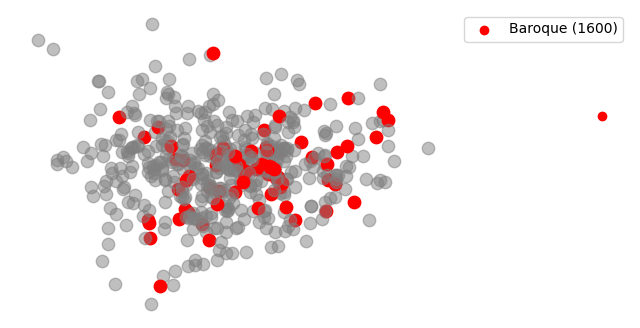

In [55]:
plot_transformed_map_one_movement(transformed_map, 500, "Baroque")

In [57]:
def plot_transformed_map_multiple_movements(transformed_map, n_show=100):
    movements = list(movement_year_map.keys())  # List of all movements
    n_movements = len(movements)
    
    n_cols = 2
    n_rows = math.ceil(n_movements / n_cols)
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axs = axs.flatten()
    
    for i, movement in enumerate(movements):
        ax = axs[i]
        for image_name, point in random.sample(list(transformed_map.items()), n_show):
            x, y = point
            img_color = img_name_to_clr(image_name) if image_name.split("/")[0] == movement else "grey"
            alpha = 1 if image_name.split("/")[0] == movement else 0.5
            ax.scatter(x, y, color=img_color, s=80, alpha=alpha)

        year = movement_year_map[movement]
        ax.scatter(0, 0, color=movement_colors[movement], label=f"{movement} ({year})")
        ax.legend()
        ax.set_title(movement)
        ax.axis('off')

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


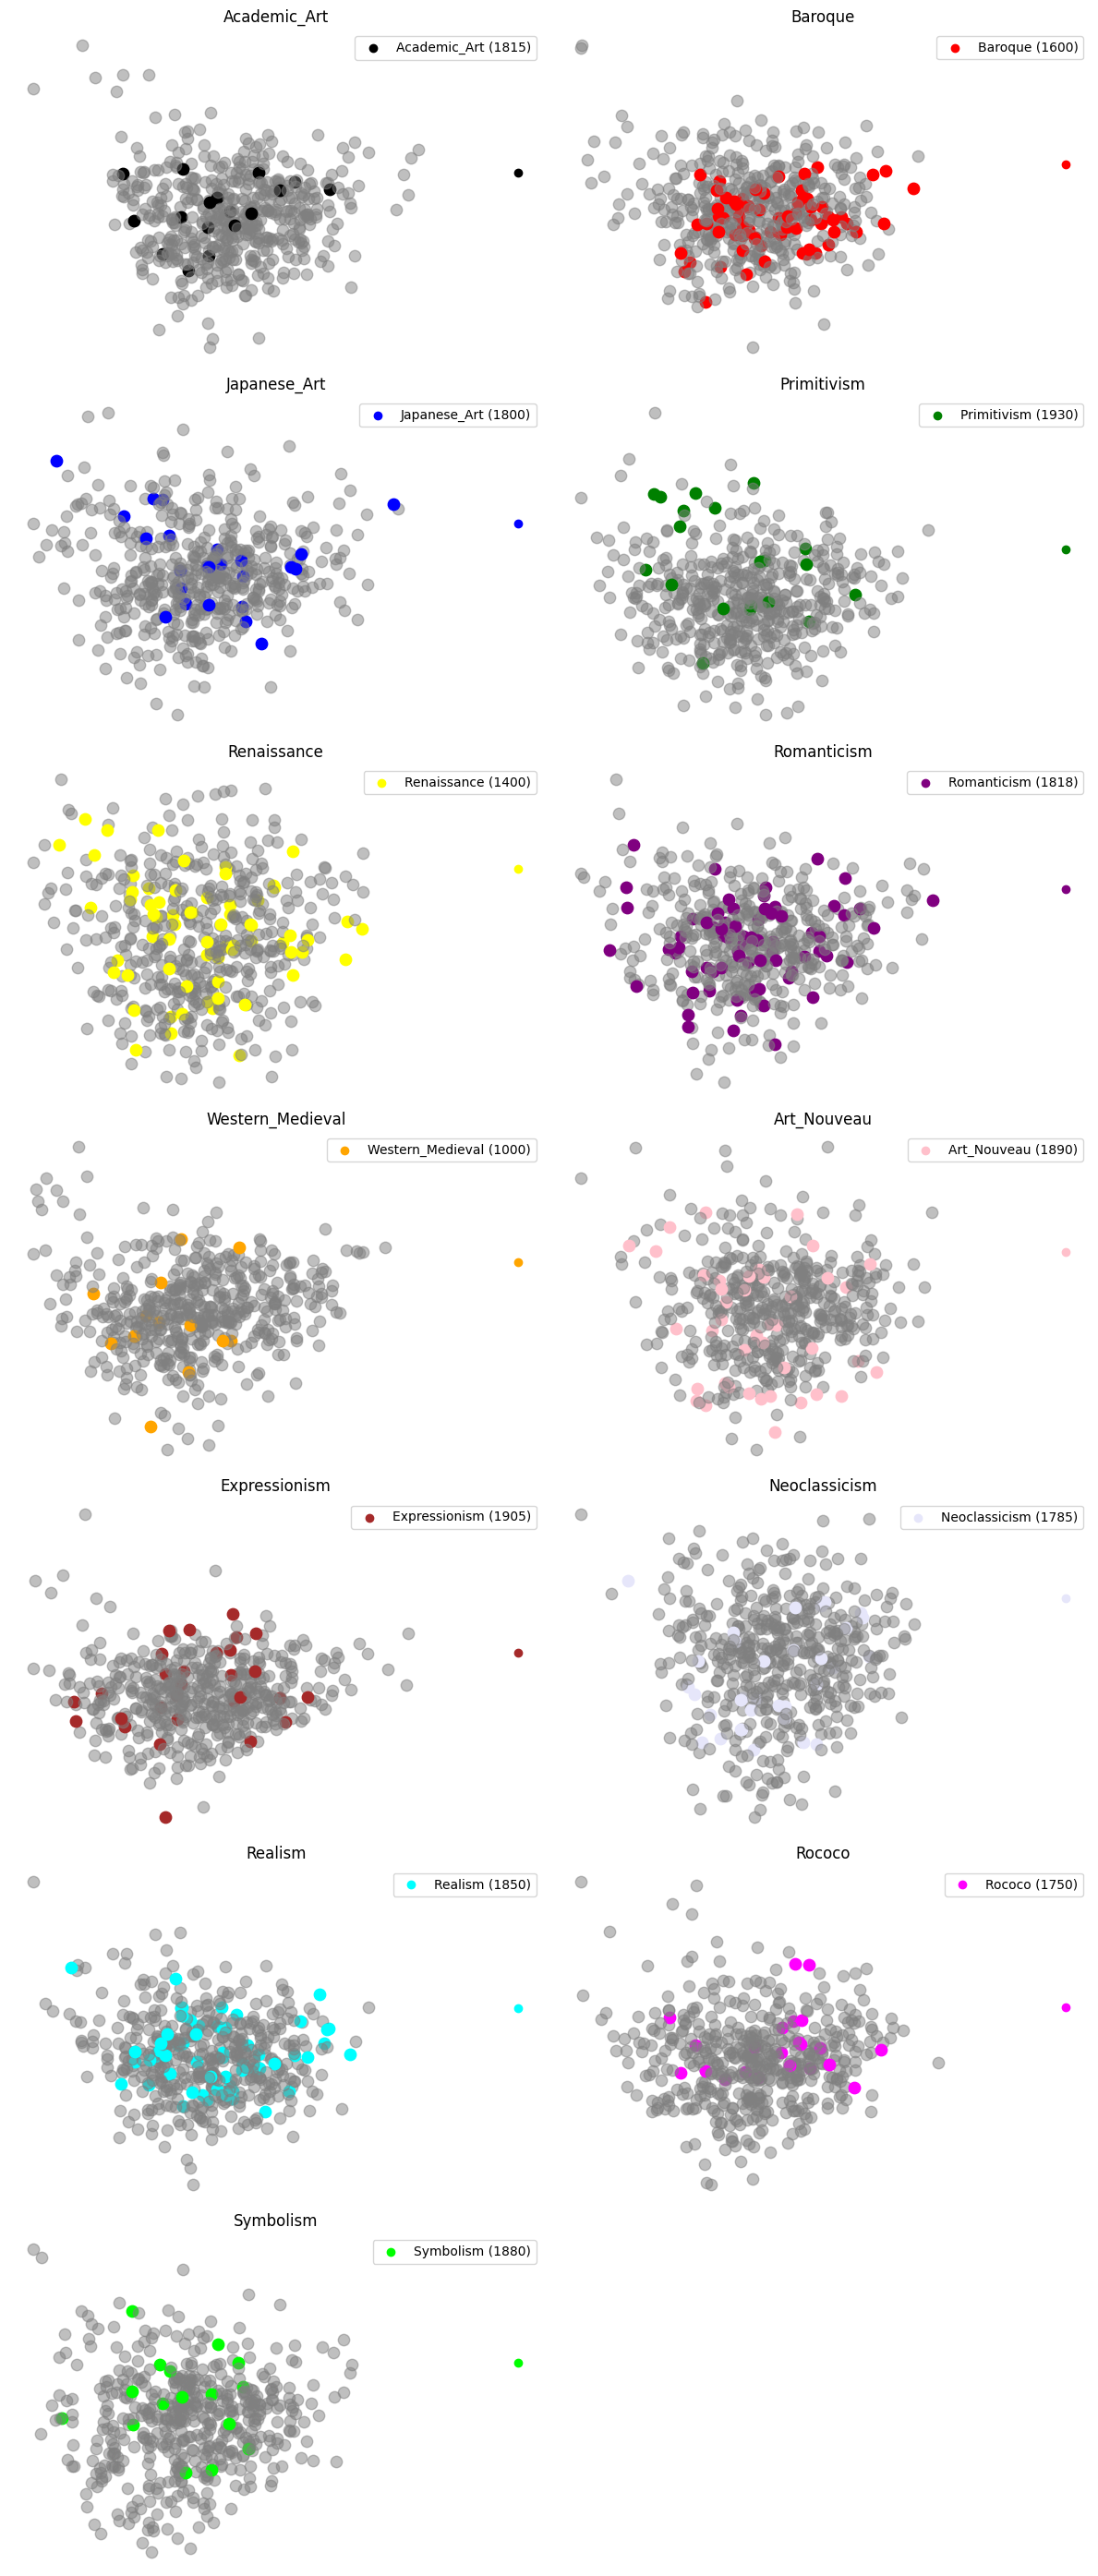

In [60]:
plot_transformed_map_multiple_movements(transformed_map, 500)